<a href="https://colab.research.google.com/github/ss-ghule/connectivity_using_ml/blob/master/model_def_train_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

In [0]:
# The code was removed by Watson Studio for sharing.

In [0]:
!rm data_training.csv
!ls

10390.png      13568.png   24529.png	6325.png   69319.png  887.png
106705.png     137201.png  24547.png	6329.png   74209.png  9237.png
11269.png      140746.png  24823.png	6335.png   74348.png  931.png
1146.png       143710.png  3283.png	6360.png   7732.png   9964.png
11473.png      144018.png  33558.png	6375.png   77628.png  996.png
11638.png      14917.png   5206.png	6386.png   783.png    BASKVILL.TTF
11646.png      176.png	   5365279.png	6393.png   7845.png   data_raw.csv
12228.png      177.png	   552549.png	6410.png   784.png    pairs_dict.pkl
12246.png      18196.png   566545.png	6569.png   7929.png
123257.png     222.png	   5962.png	66074.png  7952.png
123502.png     240.png	   6115.png	66978.png  8033.png
127602.png     241.png	   6319.png	67180.png  8053.png
135504501.png  243.png	   6324.png	674.png    8058.png


In [0]:
download_file_cos(credentials_1, 'data_training.csv', 'data_training.csv')
!ls

File Downloaded
10390.png      13568.png   24529.png	6325.png   69319.png  887.png
106705.png     137201.png  24547.png	6329.png   74209.png  9237.png
11269.png      140746.png  24823.png	6335.png   74348.png  931.png
1146.png       143710.png  3283.png	6360.png   7732.png   9964.png
11473.png      144018.png  33558.png	6375.png   77628.png  996.png
11638.png      14917.png   5206.png	6386.png   783.png    BASKVILL.TTF
11646.png      176.png	   5365279.png	6393.png   7845.png   data_raw.csv
12228.png      177.png	   552549.png	6410.png   784.png    data_training.csv
12246.png      18196.png   566545.png	6569.png   7929.png   pairs_dict.pkl
123257.png     222.png	   5962.png	66074.png  7952.png
123502.png     240.png	   6115.png	66978.png  8033.png
127602.png     241.png	   6319.png	67180.png  8053.png
135504501.png  243.png	   6324.png	674.png    8058.png


In [0]:
!head -10 data_training.csv

pairs_enc,distance,bond
0,1.5119999999999998,1
2,1.0940555607463451,1
2,1.0940439342183659,1
2,1.0940911982097288,1
2,2.1553485031428212,0
2,1.0940439342183659,1
2,1.0940911982097288,1
2,1.0940555607463451,1
2,1.0940439342183659,0


# Train,Val,Test Split

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [0]:
x=pd.read_csv('data_training.csv')

In [3]:
x.head()

,pairs_enc,distance,bond
0,0,1.512000,1
1,2,1.094056,1
2,2,1.094044,1
3,2,1.094091,1
4,2,1.094044,1


In [4]:
x.shape

(2222, 3)

In [5]:
x.columns

Index(['pairs_enc', 'distance', 'bond'], dtype='object')

In [0]:
y=x['bond']

In [0]:
x=x.drop('bond',axis=1)

In [8]:
x.head()

,pairs_enc,distance
0,0,1.512000
1,2,1.094056
2,2,1.094044
3,2,1.094091
4,2,1.094044


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: bond, dtype: int64

In [0]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3)

In [11]:
print('x_train: {}  y_train: {}\nx_val: {}  y_val: {}'.format(x_train.shape,y_train.shape,x_val.shape,y_val.shape))

x_train: (1555, 2)  y_train: (1555,)
x_val: (667, 2)  y_val: (667,)


In [0]:
x_val,x_test,y_val,y_test=train_test_split(x_val,y_val,test_size=0.5)

In [13]:
print('x_val: {}  y_val: {}\nx_test: {}  y_test: {}'.format(x_val.shape,y_val.shape,x_test.shape,y_test.shape))

x_val: (333, 2)  y_val: (333,)
x_test: (334, 2)  y_test: (334,)


In [14]:
y_val.value_counts()

1    174
0    159
Name: bond, dtype: int64

In [15]:
y_test.value_counts()

1    171
0    163
Name: bond, dtype: int64

In [16]:
y_train.value_counts()

0    789
1    766
Name: bond, dtype: int64

# Model

In [0]:
tf.__version__

'1.13.1'

## 1. NN

In [17]:
input_shape=(2,)
model_nn=keras.Sequential()
model_nn.add(keras.layers.Dense(8,activation='relu',input_shape=input_shape))
model_nn.add(keras.layers.Dense(64,activation='relu'))
model_nn.add(keras.layers.Dense(64,activation='relu'))
model_nn.add(keras.layers.Dense(128,activation='relu'))
model_nn.add(keras.layers.Dense(128,activation='relu'))
model_nn.add(keras.layers.Dense(256,activation='relu'))
model_nn.add(keras.layers.Dense(512,activation='relu'))
model_nn.add(keras.layers.Dense(512,activation='relu'))
model_nn.add(keras.layers.Dense(128,activation='relu'))
model_nn.add(keras.layers.Dense(128,activation='relu'))
model_nn.add(keras.layers.Dense(64,activation='relu'))
model_nn.add(keras.layers.Dense(64,activation='relu'))
model_nn.add(keras.layers.Dense(8,activation='relu'))
model_nn.add(keras.layers.Dense(8,activation='relu'))
model_nn.add(keras.layers.Dense(1,activation='sigmoid'))

W0903 03:52:48.310213 140048041768832 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1

In [0]:
#help(model_nn.compile)

In [20]:
model_nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

W0903 03:53:57.262459 140048041768832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
history=model_nn.fit(x_train,y_train,batch_size=64,epochs=100,validation_data=(x_val,y_val))

Train on 1555 samples, validate on 333 samples
Epoch 1/100
1555/1555 [==============================] - 1s 744us/sample - loss: 0.6052 - acc: 0.5955 - val_loss: 0.5467 - val_acc: 0.8198
Epoch 2/100
1555/1555 [==============================] - 0s 95us/sample - loss: 0.5018 - acc: 0.8270 - val_loss: 0.5701 - val_acc: 0.7447
Epoch 3/100
1555/1555 [==============================] - 0s 91us/sample - loss: 0.4874 - acc: 0.8199 - val_loss: 0.4195 - val_acc: 0.8438
Epoch 4/100
1555/1555 [==============================] - 0s 94us/sample - loss: 0.3876 - acc: 0.8469 - val_loss: 0.4173 - val_acc: 0.8378
Epoch 5/100
1555/1555 [==============================] - 0s 95us/sample - loss: 0.3499 - acc: 0.8611 - val_loss: 0.4078 - val_acc: 0.8438
Epoch 6/100
1555/1555 [==============================] - 0s 93us/sample - loss: 0.3456 - acc: 0.8592 - val_loss: 0.4136 - val_acc: 0.8318
Epoch 7/100
1555/1555 [==============================] - 0s 89us/sample - loss: 0.3456 - acc: 0.8611 - val_loss: 0.3834 - va

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(15,8))
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Acc')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Acc')
  #plt.ylim([0,20])
  plt.legend()


  plt.show()

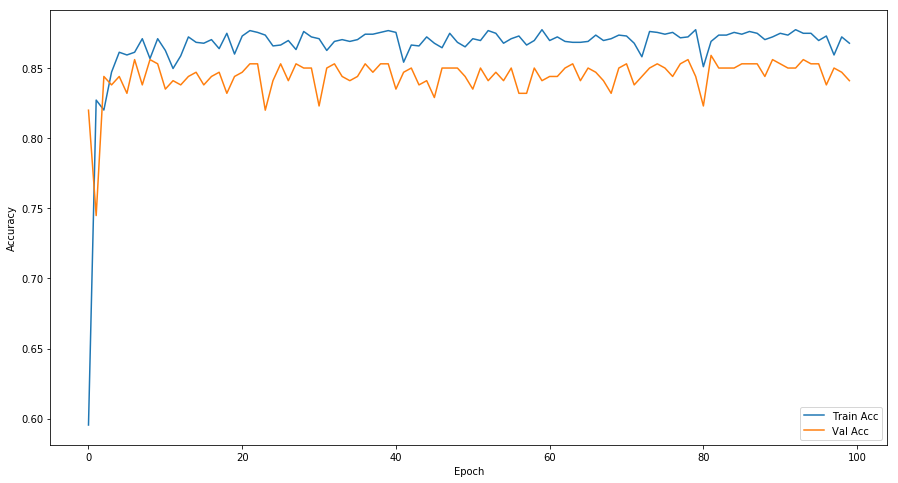

In [28]:
plot_history(history)

In [0]:
model_nn.evaluate(x_test,y_test)

334/334 [==============================] - 1s 3ms/sample - loss: 0.3930 - acc: 0.8533


[0.39302008648118575, 0.8532934]

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model_rf=RandomForestClassifier(max_depth=30)
model_rf.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred=model_rf.predict(x_test)

In [0]:
accuracy_score(y_test,y_pred)

0.8263473053892215

## GBM, SVM, Logistic Regression

### Hyperparameter tuning

# Serialize Models

In [0]:
#model_nn.save('connectivity_model_nn_02.h5')
"""
Did not work after importing in another notebook
"""

In [0]:
#This method worked
tf.keras.models.save_model(model_nn,'connectivity_model_nn_03.h5',overwrite=True,include_optimizer=True)

In [0]:
!ls

10390.png      140746.png  33558.png	6393.png   7929.png
106705.png     143710.png  5206.png	6410.png   7952.png
11269.png      144018.png  5365279.png	6569.png   8033.png
1146.png       14917.png   552549.png	66074.png  8053.png
11473.png      176.png	   566545.png	66978.png  8058.png
11638.png      177.png	   5962.png	67180.png  887.png
11646.png      18196.png   6115.png	674.png    9237.png
12228.png      222.png	   6319.png	69319.png  931.png
12246.png      240.png	   6324.png	74209.png  9964.png
123257.png     241.png	   6325.png	74348.png  996.png
123502.png     243.png	   6329.png	7732.png   BASKVILL.TTF
127602.png     24529.png   6335.png	77628.png  connectivity_model_nn_03.h5
135504501.png  24547.png   6360.png	783.png    data_raw.csv
13568.png      24823.png   6375.png	7845.png   data_training.csv
137201.png     3283.png    6386.png	784.png    pairs_dict.pkl


# Upload to IBM Object Store

## 1. Current Project bucket

In [0]:
# The code was removed by Watson Studio for sharing.

In [0]:
upload_file_cos(credentials_1,'connectivity_model_nn_03.h5','connectivity_model_nn_03.h5')

File Uploaded


## 2. Coursera/Kaggle project bucket

In [0]:
# The code was removed by Watson Studio for sharing.

In [0]:
upload_file_cos(credentials_2,'connectivity_model_nn_03.h5','connectivity_model_nn_03.h5')

File Uploaded
